In [119]:
import os
import torch
from forward_model import get_forward_model
from utils import (dict_to_str, get_images_folder,
                   get_results_folder, load_target_image, load_trained_net,
                   psnr, psnr_from_mse, load_pretrained_dcgan_gen, load_pretrained_began_gen)

In [120]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
args = {
#     'mask_name': '04179.png'
    # 'mask_name': '04165.png'
    # 'mask_name': '04138.png'
    'mask_name': '04124.png'
}

args['img_shape'] = (3,128,128)
fwd = get_forward_model('InpaintingIrregular', **args)

In [242]:
orig_img = load_target_image(os.path.join('./images/ood-examples', 'arm.jpg'), 128).to('cuda:0')

In [243]:
orig_img

tensor([[[0.6706, 0.6706, 0.6706,  ..., 0.4314, 0.4314, 0.3882],
         [0.8510, 0.8588, 0.8471,  ..., 0.4196, 0.3373, 0.3137],
         [0.9647, 0.9608, 0.9451,  ..., 0.3098, 0.3569, 0.4118],
         ...,
         [0.4275, 0.3961, 0.3922,  ..., 0.6078, 0.6078, 0.6039],
         [0.4353, 0.4039, 0.3608,  ..., 0.6078, 0.6118, 0.6118],
         [0.4196, 0.4000, 0.3451,  ..., 0.6118, 0.6157, 0.6196]],

        [[0.5882, 0.5922, 0.6000,  ..., 0.3765, 0.4078, 0.3922],
         [0.7294, 0.7333, 0.7373,  ..., 0.3961, 0.3333, 0.3216],
         [0.8549, 0.8431, 0.8275,  ..., 0.3059, 0.3647, 0.4275],
         ...,
         [0.3961, 0.3529, 0.3490,  ..., 0.5294, 0.5255, 0.5373],
         [0.4000, 0.3647, 0.3216,  ..., 0.5255, 0.5294, 0.5333],
         [0.3961, 0.3647, 0.3059,  ..., 0.5294, 0.5294, 0.5373]],

        [[0.5686, 0.5686, 0.5686,  ..., 0.3294, 0.3725, 0.3686],
         [0.6431, 0.6471, 0.6510,  ..., 0.3765, 0.3294, 0.3137],
         [0.7137, 0.7059, 0.6902,  ..., 0.3137, 0.3647, 0.

In [244]:
orig_img_ex = orig_img.expand(1, *orig_img.shape)

In [245]:
orig_img_ex.shape

torch.Size([1, 3, 128, 128])

In [246]:
forwarded = fwd(orig_img_ex)

In [247]:
inversed = fwd.inverse(orig_img_ex)

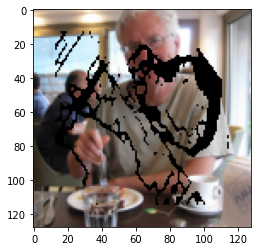

In [248]:
import matplotlib.pyplot as plt
plt.imshow(  forwarded.detach().cpu().squeeze().permute(1, 2, 0)  )

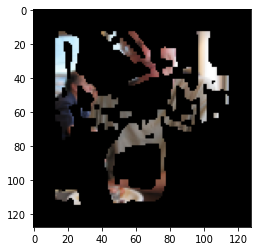

In [240]:
import matplotlib.pyplot as plt
plt.imshow(  inversed.detach().cpu().squeeze().permute(1, 2, 0)  )

In [230]:
mask = fwd.A.detach().cpu().squeeze()

In [191]:
torch.unique(fwd.A)

tensor([0., 1.], device='cuda:0')

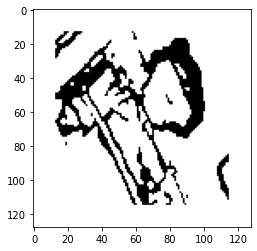

In [152]:
plt.imshow(mask, cmap=plt.get_cmap('gray'))